In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib as mpl
import itertools as it
import argparse as ap
import statannot
# pd.set_option('display.max_rows', 100)

In [3]:
%run contactBarplots_functions.py -i '../resource/sampleinfo_TriC12.tsv' -r '../resource/regions_of_interest_mm9.tsv' \
	-r1 'mu+' 'ISCEgamma1+-5kb' '3CBE3RR' -r2 'mu+' 'ISCEgamma1+-5kb' '3CBE3RR' \
	--prefix 'TriC12_lane_1_B18AIDKO' \
	--dir '../TriCplots/TriC12_mapq20' --capture 'IgG1_pool_capture' --genome 'mm9' --igh 114435000 114669000 --selfInt
contactsums = contactsums[::-1]
contactsums


The interaction of region1 mu+ with region2 ISCEgamma1+-5kb was not included because it is in wrong order. Please switch their places if the interaction should be included.
The interaction of region1 mu+ with region2 3CBE3RR was not included because it is in wrong order. Please switch their places if the interaction should be included.
The interaction of region1 ISCEgamma1+-5kb with region2 3CBE3RR was not included because it is in wrong order. Please switch their places if the interaction should be included.
The interaction of region1 mu+ with region2 ISCEgamma1+-5kb was not included because it is in wrong order. Please switch their places if the interaction should be included.
The interaction of region1 mu+ with region2 3CBE3RR was not included because it is in wrong order. Please switch their places if the interaction should be included.
The interaction of region1 ISCEgamma1+-5kb with region2 3CBE3RR was not included because it is in wrong order. Please switch their places if the in

,sample,replicate,treatment_time,region1,region2,pinteractions,regioncomb
95,TriC12_lane_1_B18AIDKO3,3,d3,3CBE3RR,3CBE3RR,20.718448,3CBE3RR - 3CBE3RR
94,TriC12_lane_1_B18AIDKO3,3,d3,3CBE3RR,ISCEgamma1+-5kb,5.449991,3CBE3RR - ISCEgamma1+-5kb
93,TriC12_lane_1_B18AIDKO3,3,d3,3CBE3RR,mu+,6.363568,3CBE3RR - mu+
92,TriC12_lane_1_B18AIDKO3,3,d3,ISCEgamma1+-5kb,ISCEgamma1+-5kb,62.790485,ISCEgamma1+-5kb - ISCEgamma1+-5kb
91,TriC12_lane_1_B18AIDKO3,3,d3,ISCEgamma1+-5kb,mu+,13.148542,ISCEgamma1+-5kb - mu+
...,...,...,...,...,...,...,...
4,TriC12_lane_1_B18AIDKO2,1,d0,3CBE3RR,ISCEgamma1+-5kb,5.570055,3CBE3RR - ISCEgamma1+-5kb
3,TriC12_lane_1_B18AIDKO2,1,d0,3CBE3RR,mu+,2.126004,3CBE3RR - mu+
2,TriC12_lane_1_B18AIDKO2,1,d0,ISCEgamma1+-5kb,ISCEgamma1+-5kb,63.650230,ISCEgamma1+-5kb - ISCEgamma1+-5kb
1,TriC12_lane_1_B18AIDKO2,1,d0,ISCEgamma1+-5kb,mu+,10.030446,ISCEgamma1+-5kb - mu+


ISCEgamma1+-5kb_d2 v.s. ISCEgamma1+-5kb_d0: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.625e+00
mu+_d3 v.s. mu+_d2: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.518e+00
mu+_d2 v.s. mu+_d0: t-test independent samples with Bonferroni correction, P_val=2.290e-04 stat=8.619e+00
3CBE3RR_d3 v.s. 3CBE3RR_d2: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.132e-01
3CBE3RR_d2 v.s. 3CBE3RR_d0: t-test independent samples with Bonferroni correction, P_val=3.378e-02 stat=4.037e+00
ISCEgamma1+-5kb_d3 v.s. ISCEgamma1+-5kb_d2: t-test independent samples with Bonferroni correction, P_val=9.220e-01 stat=1.798e+00
mu+_d3 v.s. mu+_d0: t-test independent samples with Bonferroni correction, P_val=1.087e-04 stat=9.537e+00
ISCEgamma1+-5kb_d3 v.s. ISCEgamma1+-5kb_d0: t-test independent samples with Bonferroni correction, P_val=4.371e-02 stat=3.853e+00
3CBE3RR_d3 v.s. 3CBE3RR_d0: t-test independent samples with Bonf

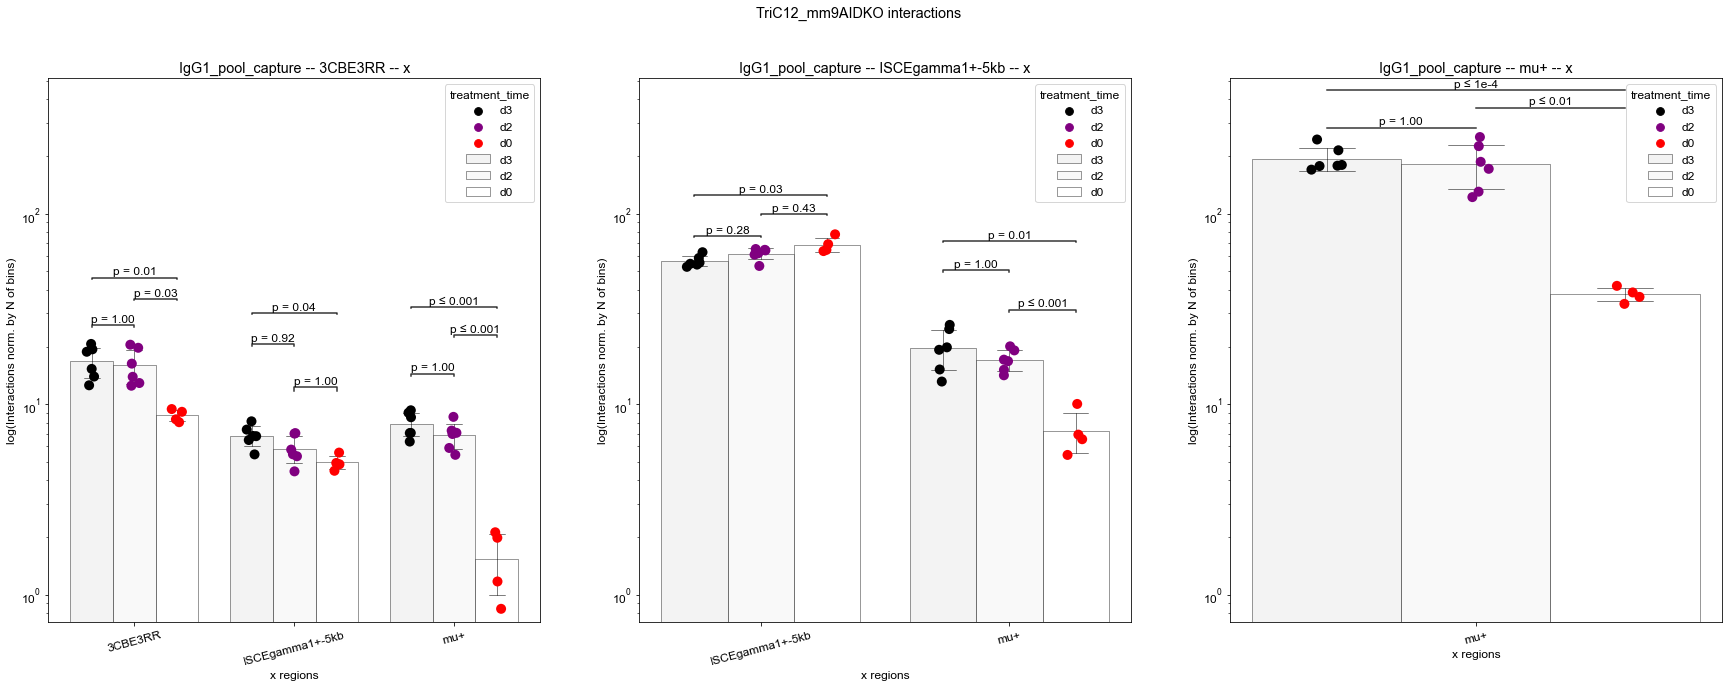

In [4]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 0.5

fig = plt.figure(figsize=(30,10))

# maxInteraction = max(contactsums['pinteractions'])
# maxInteraction = maxInteraction + maxInteraction/10

ymax = max(contactsums['pinteractions']) +0.5
axCounter = 1
for (region1, group) in contactsums.groupby('region1'): # for each subplot / region1
	# ax = fig.add_subplot(1, len(set(contactsums.region1)), axCounter)
	ax = fig.add_subplot(int(str(1) + str(len(set(contactsums.region2))) + str(axCounter)), sharey = ax) if axCounter > 1 else fig.add_subplot(int(str(1) + str(len(set(contactsums.region2))) + str(axCounter)), yscale = 'log')
	axCounter = axCounter + 1
	sns.barplot(data=group, x='region2', y='pinteractions', hue='treatment_time', ci='sd', color='white', linewidth=0.5, edgecolor='black', 
		errcolor='black', errwidth=0.5, capsize=0.1, alpha=0.8, ax=ax)
	sns.stripplot(data=group, x='region2', y='pinteractions', hue='treatment_time', ax=ax, dodge=True, size=10,
		palette=['black', 'purple', 'red'])

	boxlist = [] # list with pairs for statistical significance test
	for reg in group['region2'].unique():
		boxlist = boxlist + [((reg, contactsums['treatment_time'].unique()[0]), (reg, contactsums['treatment_time'].unique()[1])), ((reg, contactsums['treatment_time'].unique()[1]), (reg, contactsums['treatment_time'].unique()[2])), ((reg, contactsums['treatment_time'].unique()[0]), (reg, contactsums['treatment_time'].unique()[2]))]
	statannot.add_stat_annotation(ax, data=group, x='region2', y='pinteractions', hue='treatment_time', 
		box_pairs=boxlist, test='t-test_ind', text_format='simple', verbose=2, line_offset=0.3, line_offset_to_box=0.2)
	
	handles, labels = ax.get_legend_handles_labels()
	# ax.legend_.remove()
	# ax.legend(handles, ['Spt5 deprived', 'ctrl'])
	ax.set_ylabel('log(Interactions norm. by N of bins)')
	ax.set_xlabel("x regions")
	ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
	ax.set_title(f'IgG1_pool_capture -- {region1} -- x')
fig.suptitle('TriC12_mm9AIDKO interactions')

fig.savefig('../plots/TriC12/TriC12_mm9AIDKO_RegOfInterest_IgG1poolCap_allZones.pdf')


ISCEgamma1+-5kb - mu+_d3 v.s. ISCEgamma1+-5kb - mu+_d0: t-test independent samples with Bonferroni correction, P_val=1.047e-02 stat=4.605e+00
mu+ - mu+_d3 v.s. mu+ - mu+_d0: t-test independent samples with Bonferroni correction, P_val=3.723e-05 stat=1.043e+01
3CBE3RR - mu+_d3 v.s. 3CBE3RR - mu+_d0: t-test independent samples with Bonferroni correction, P_val=7.248e-05 stat=9.537e+00
3CBE3RR - 3CBE3RR_d3 v.s. 3CBE3RR - 3CBE3RR_d0: t-test independent samples with Bonferroni correction, P_val=8.807e-03 stat=4.738e+00
3CBE3RR - ISCEgamma1+-5kb_d3 v.s. 3CBE3RR - ISCEgamma1+-5kb_d0: t-test independent samples with Bonferroni correction, P_val=2.914e-02 stat=3.853e+00
ISCEgamma1+-5kb - ISCEgamma1+-5kb_d3 v.s. ISCEgamma1+-5kb - ISCEgamma1+-5kb_d0: t-test independent samples with Bonferroni correction, P_val=2.718e-02 stat=-3.902e+00


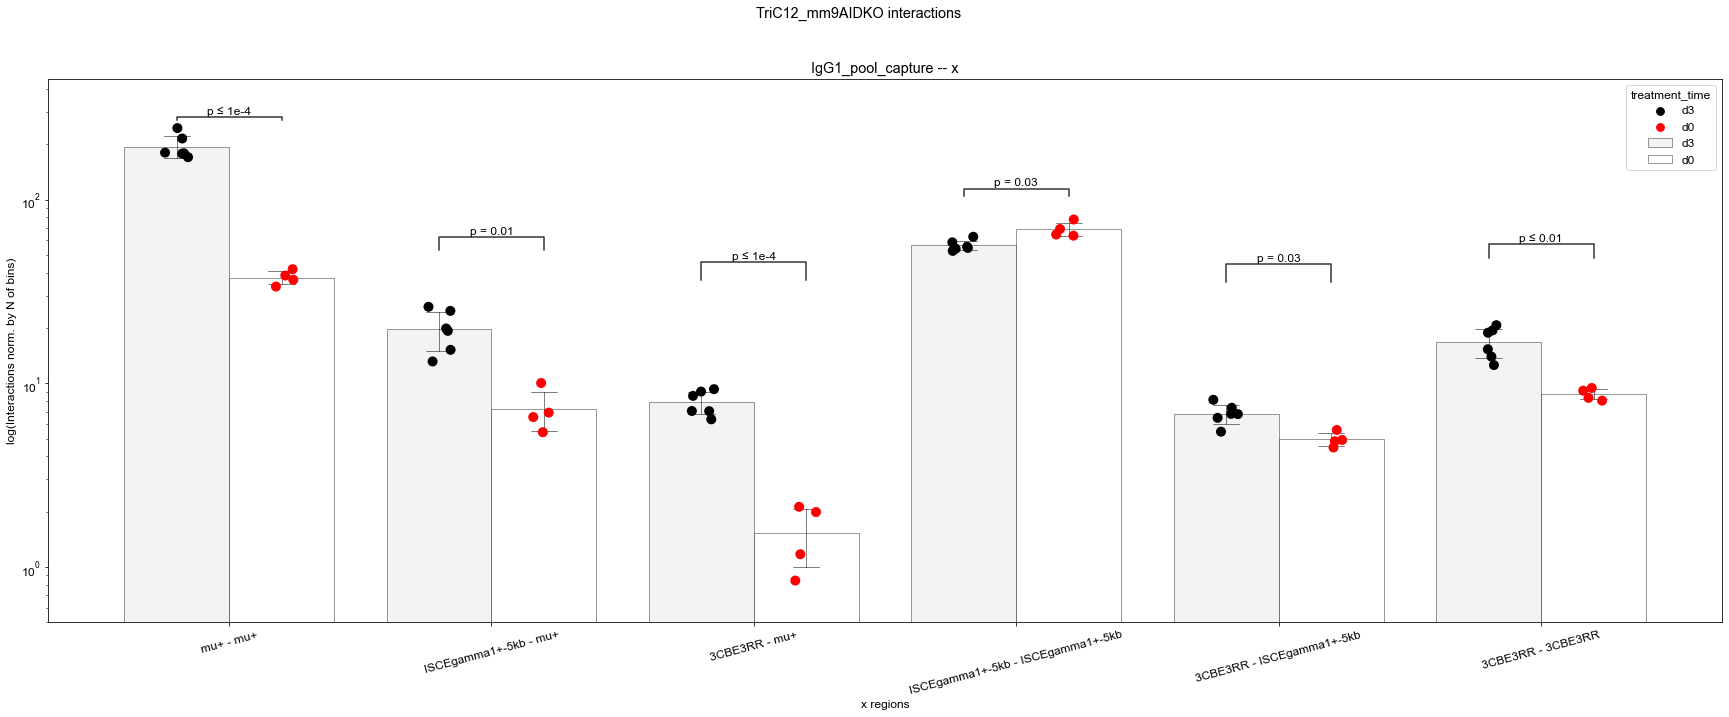

In [7]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 0.5

contactsums = contactsums.drop(contactsums[contactsums.treatment_time == 'd2'].index)
region_order = ['mu+ - mu+', 'ISCEgamma1+-5kb - mu+', '3CBE3RR - mu+', 'ISCEgamma1+-5kb - ISCEgamma1+-5kb', '3CBE3RR - ISCEgamma1+-5kb', '3CBE3RR - 3CBE3RR']

fig = plt.figure(figsize=(30,10))

# maxInteraction = max(contactsums['pinteractions'])
# maxInteraction = maxInteraction + maxInteraction/10

ymax = max(contactsums['pinteractions']) +0.5

# ax = fig.add_subplot(1, len(set(contactsums.region1)), axCounter)
ax = fig.add_subplot(111, yscale = 'log')
sns.barplot(data=contactsums, x='regioncomb', y='pinteractions', hue='treatment_time', ci='sd', color='white', linewidth=0.5, edgecolor='black', 
	errcolor='black', errwidth=0.5, capsize=0.1, alpha=0.8, order=region_order, ax=ax, bottom=0.001)
sns.stripplot(data=contactsums, x='regioncomb', y='pinteractions', hue='treatment_time', ax=ax, dodge=True, size=10,
	order=region_order, palette=['black', 'red'])

boxlist = [] # list with pairs for statistical significance test
for reg in contactsums['regioncomb'].unique():
	boxlist = boxlist + [((reg, contactsums['treatment_time'].unique()[0]), (reg, contactsums['treatment_time'].unique()[1]))]
statannot.add_stat_annotation(ax, data=contactsums, x='regioncomb', y='pinteractions', hue='treatment_time', box_pairs=boxlist, order=region_order, test='t-test_ind', text_format='simple', verbose=2)


handles, labels = ax.get_legend_handles_labels()
# ax.legend_.remove()
# ax.legend(handles, ['Spt5 deprived', 'ctrl'])
ax.set_ylabel('log(Interactions norm. by N of bins)')
ax.set_xlabel("x regions")
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
ax.set_title(f'IgG1_pool_capture -- x')
fig.suptitle('TriC12_mm9AIDKO interactions')
ax.set_ylim(0.5)

fig.savefig('../plots/TriC12/TriC12_mm9AIDKO_RegOfInterest_IgG1poolCap_allZones_combined.pdf')
